In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%matplotlib inline

loc = r"C:\Users\me\Documents\datasets\black_train_for_eda.csv"
loc2 = r"C:\Users\me\Documents\datasets\black_test_for_eda.csv"
loc3 = r"C:\Users\me\Documents\datasets\black_train.csv"

train = pd.read_csv(loc)
test = pd.read_csv(loc2)
data = pd.concat([train, test])
original_train = pd.read_csv(loc3)

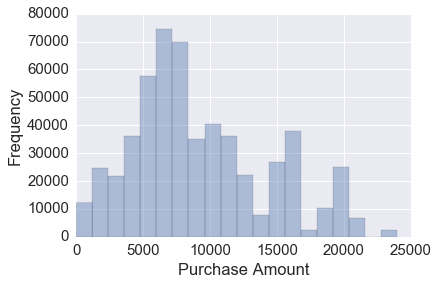

In [2]:
ax = sns.distplot(train.Purchase, kde=False, bins=20)
ax.set(xlabel='Purchase Amount', ylabel='Frequency')

In [ ]:
#The majority of purchases were roughly below $12,500.

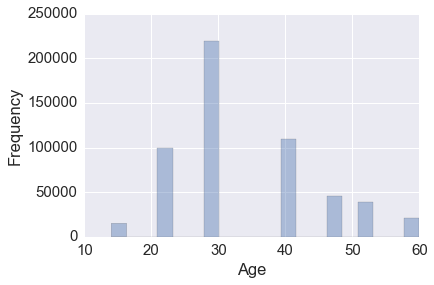

In [3]:
ax = sns.distplot(train.Age, kde=False, bins=20)
ax.set(xlabel='Age', ylabel='Frequency')

In [ ]:
#People between 20-40 are the most represented, this suggests that the store in question 
#caters to this age group more than others.

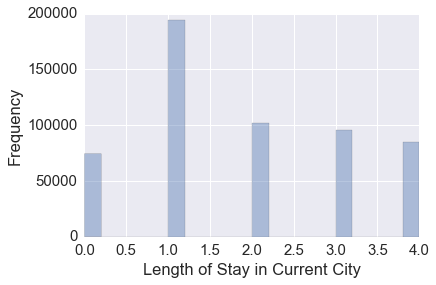

In [4]:
ax = sns.distplot(train.Stay_In_Current_City_Years, kde=False, bins=20)
ax.set(xlabel='Length of Stay in Current City', ylabel='Frequency')

In [ ]:
#This plot suggests that the customer base is quite a mobile one, very
#few customers fall into the 4 years category (which also contains 4+ years
#residents).

In [5]:
city_a = data.City_Category_A.sum()
city_b = data.City_Category_B.sum()
city_c = data.City_Category_C.sum()

print (city_a, city_b, city_c)

210244.0 329739.0 243684.0


In [ ]:
#Most customers are from city B. Perhaps the company has more stores in this
#category of city or it's primary customer base is better represented in such
#cities.

In [7]:
unmarried = data.Marital_Status_0.sum()
married = data.Marital_Status_1.sum()
print (unmarried, married)

462538.0 321129.0


In [ ]:
#The majority of customers are not married which makes sense given the age
#range of our customers we saw earlier.

In [8]:
corr_df = train.drop(['User_ID', 'Product_ID'], axis=1).corr()
corr_dict = corr_df['Purchase'].to_dict()
del corr_dict['Purchase']
print("List the numerical features decendingly by their correlation with Purchase:\n")
for ele in sorted(corr_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Purchase:

Product_Mean: 	0.8496588244088487
Product_Category_1_1: 	0.5060206244853
Product_Category_1_5: 	-0.3701931581023528
Product_Count: 	0.30864138129961305
Product_Category_1_6: 	0.25729812343373604
Product_Category_1_4: 	-0.2039815531280082
Product_Category_1_10: 	0.20101132458854984
Product_Category_1_11: 	-0.1959107505624953
Product_Category_1_8: 	-0.17958661087265285
Product_Category_1_13: 	-0.1716603579023712
Product_Category_1_16: 	0.14773954163243777
Product_Category_1_12: 	-0.13392690282338382
Product_Category_1_20: 	-0.12082993806619464
Product_Category_1_15: 	0.1181158996143239
Product_Category_1_7: 	0.11667846737677376
Product_Category_1_19: 	-0.09930724762065019
Product_Category_1_18: 	-0.09467001175833728
User_Count: 	-0.09035588266187795
Product_Category_1_2: 	0.0842820730511923
City_Category_C: 	0.0610116586648019
Gender_M: 	0.06034568441977955
Gender_F: 	-0.06034568441977955
City_Category_A: 	-0.04

In [ ]:
#Purchase amount only strongly correlates with two variables: Product_Mean
#and Product_Category_1_5. There are several tiny coefficients.
#Interestingly most of the Occupation columns, Age and Marital_Status are particularly small.

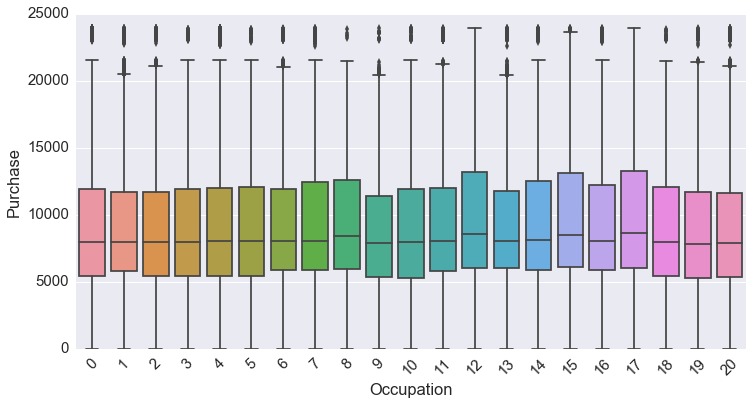

In [9]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Occupation', y = 'Purchase',  data = original_train)

In [ ]:
#There's very little variation between the different occupation types.

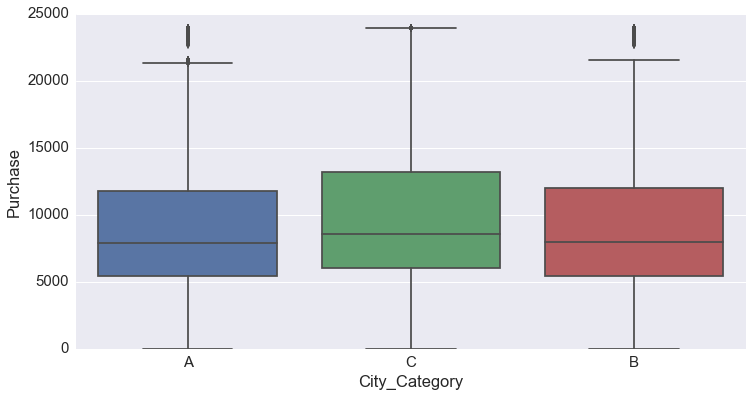

In [12]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'City_Category', y = 'Purchase',  data = original_train)

In [ ]:
#Most customers are from City B but the highest average spenders are from City
#C.

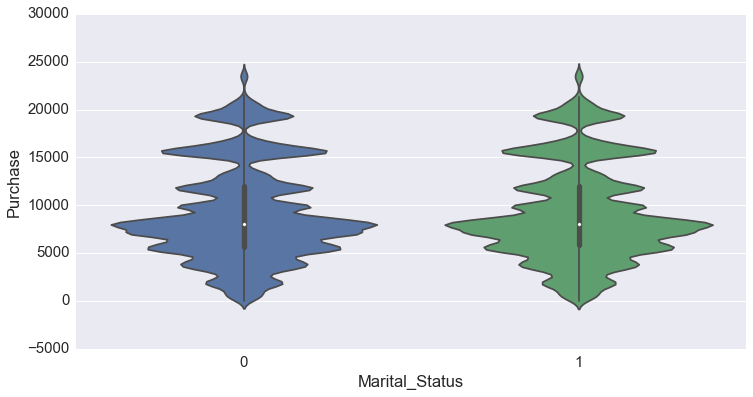

In [13]:
plt.figure(figsize = (12, 6))
sns.violinplot(x="Marital_Status", y="Purchase", data=original_train)

In [ ]:
#The two look very similar.